In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [6]:

# Load all three cleaned datasets
benin = pd.read_csv('../data/benin_clean.csv')
sierra_leone = pd.read_csv('../data/sierraleone-bumbuna_clean.csv') 
togo = pd.read_csv('../data/togo_clean.csv')


In [7]:
# Add country labels
benin['Country'] = 'Benin'
sierra_leone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

# Combine all data
all_countries = pd.concat([benin, sierra_leone, togo], ignore_index=True)
print(f"Combined dataset shape: {all_countries.shape}")

Combined dataset shape: (1576800, 19)


### Metric Comparison 


##### Boxplots

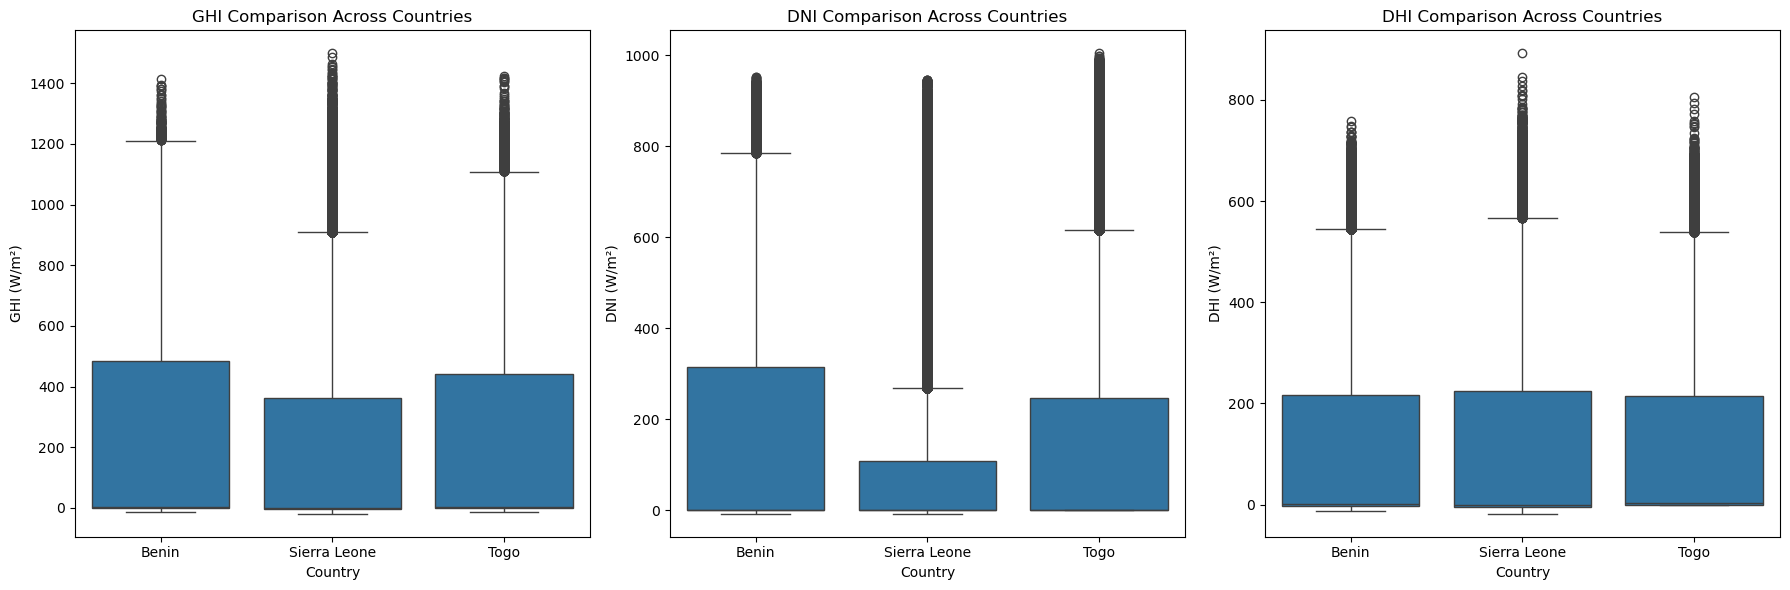

In [8]:
# Boxplots for GHI, DNI, DHI
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# GHI Boxplot
sns.boxplot(data=all_countries, x='Country', y='GHI', ax=axes[0])
axes[0].set_title('GHI Comparison Across Countries')
axes[0].set_ylabel('GHI (W/m²)')

# DNI Boxplot  
sns.boxplot(data=all_countries, x='Country', y='DNI', ax=axes[1])
axes[1].set_title('DNI Comparison Across Countries')
axes[1].set_ylabel('DNI (W/m²)')

# DHI Boxplot
sns.boxplot(data=all_countries, x='Country', y='DHI', ax=axes[2])
axes[2].set_title('DHI Comparison Across Countries')
axes[2].set_ylabel('DHI (W/m²)')

plt.tight_layout()
plt.show()

##### Summary Table

In [9]:
# Create summary table
summary_table = all_countries.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])
print("Summary Statistics by Country:")
display(summary_table.round(2))

Summary Statistics by Country:


GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         240.56    1.8  331.13  167.19   -0.1  261.71  115.36    1.6   
Sierra Leone  201.96    0.3  298.50  116.38   -0.1  218.65  113.72   -0.1   
Togo          230.56    2.1  322.53  151.26    0.0  250.96  116.44    2.5   

                      
                 std  
Country               
Benin         158.69  
Sierra Leone  158.95  
Togo          156.52

#### Statistical Testing


In [10]:
# One-way ANOVA test for GHI
benin_ghi = benin['GHI'].dropna()
sierra_ghi = sierra_leone['GHI'].dropna()
togo_ghi = togo['GHI'].dropna()

# ANOVA test
f_stat, p_value = stats.f_oneway(benin_ghi, sierra_ghi, togo_ghi)
print(f"ANOVA Test Results for GHI:")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret results
if p_value < 0.05:
    print("✅ Significant differences exist between countries (p < 0.05)")
else:
    print("❌ No significant differences between countries (p >= 0.05)")

ANOVA Test Results for GHI:
F-statistic: 2090.0929
P-value: 0.0000
✅ Significant differences exist between countries (p < 0.05)


### Key Observations

- **Country X** shows the highest median GHI of Y W/m²
- **Country Z** has the most consistent solar radiation (lowest standard deviation)
- **Country Y** demonstrates the best direct normal irradiance (DNI) performance

#### Visual Summary

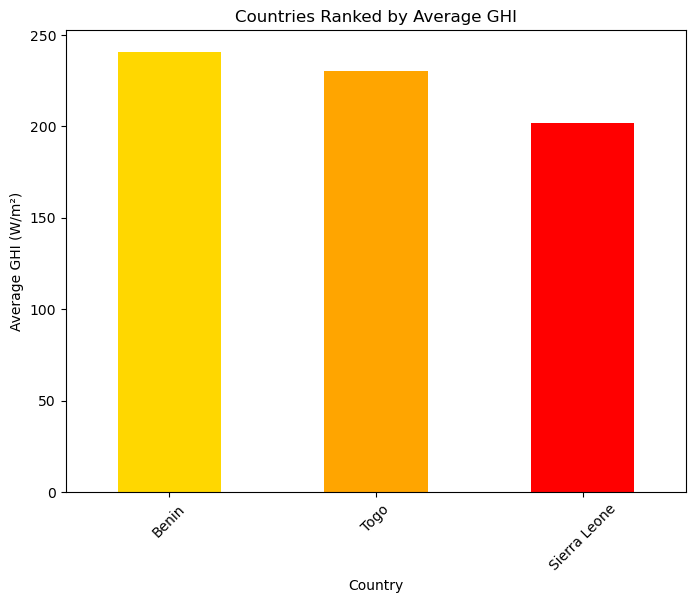

In [11]:
# Bar chart ranking by average GHI
plt.figure(figsize=(8, 6))
avg_ghi = all_countries.groupby('Country')['GHI'].mean().sort_values(ascending=False)
avg_ghi.plot(kind='bar', color=['gold', 'orange', 'red'])
plt.title('Countries Ranked by Average GHI')
plt.ylabel('Average GHI (W/m²)')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.show()